In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.drop(columns='area_room_ratio',inplace=True)

In [5]:
df.shape

(3551, 18)

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,kiran residency,sector 56,1.54,8324.0,3.0,4.0,3+,5.0,Old Property,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,98.0
1,house,independent,sohna road,0.07,2527.0,1.0,1.0,0,1.0,Relatively New,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,flat,the close north,sector 50,2.70,10365.0,3.0,3.0,3+,6.0,Moderately Old,2400.0,0.0,1.0,0.0,0.0,0.0,0.0,174.0
3,flat,dlf new town heights,sector 90,1.25,6477.0,3.0,3.0,3+,6.0,Relatively New,1929.0,0.0,1.0,0.0,1.0,0.0,0.0,136.0
4,flat,ss,sector 85,1.19,7121.0,2.0,2.0,3,11.0,Relatively New,1670.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0


In [7]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [8]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 56,1.54,3.0,4.0,3+,5.0,Old Property,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,98.0
1,house,sohna road,0.07,1.0,1.0,0,1.0,Relatively New,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,flat,sector 50,2.70,3.0,3.0,3+,6.0,Moderately Old,2400.0,0.0,1.0,0.0,0.0,0.0,0.0,174.0
3,flat,sector 90,1.25,3.0,3.0,3+,6.0,Relatively New,1929.0,0.0,1.0,0.0,1.0,0.0,0.0,136.0
4,flat,sector 85,1.19,2.0,2.0,3,11.0,Relatively New,1670.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0


### luxury score

<Axes: ylabel='luxury_score'>

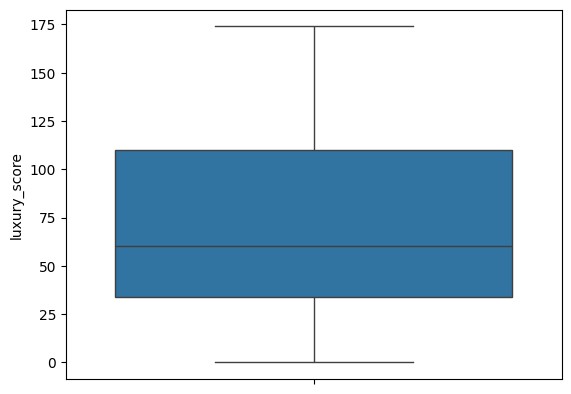

In [9]:
sns.boxplot(df['luxury_score'])

In [10]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [11]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [12]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 56,1.54,3.0,4.0,3+,5.0,Old Property,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,98.0,Medium
1,house,sohna road,0.07,1.0,1.0,0,1.0,Relatively New,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
2,flat,sector 50,2.70,3.0,3.0,3+,6.0,Moderately Old,2400.0,0.0,1.0,0.0,0.0,0.0,0.0,174.0,High
3,flat,sector 90,1.25,3.0,3.0,3+,6.0,Relatively New,1929.0,0.0,1.0,0.0,1.0,0.0,0.0,136.0,Medium
4,flat,sector 85,1.19,2.0,2.0,3,11.0,Relatively New,1670.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low


### floorNum

<Axes: ylabel='floorNum'>

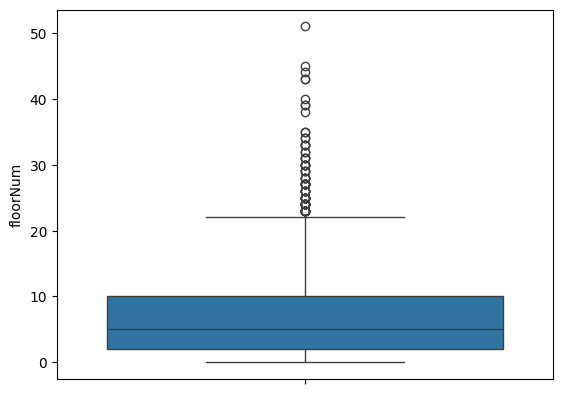

In [13]:
sns.boxplot(df['floorNum'])

In [14]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [15]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [16]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 56,1.54,3.0,4.0,3+,5.0,Old Property,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,98.0,Medium,Mid Floor
1,house,sohna road,0.07,1.0,1.0,0,1.0,Relatively New,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
2,flat,sector 50,2.70,3.0,3.0,3+,6.0,Moderately Old,2400.0,0.0,1.0,0.0,0.0,0.0,0.0,174.0,High,Mid Floor
3,flat,sector 90,1.25,3.0,3.0,3+,6.0,Relatively New,1929.0,0.0,1.0,0.0,1.0,0.0,0.0,136.0,Medium,Mid Floor
4,flat,sector 85,1.19,2.0,2.0,3,11.0,Relatively New,1670.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low,High Floor


In [17]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 56,1.54,3.0,4.0,3+,Old Property,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,Medium,Mid Floor
1,house,sohna road,0.07,1.0,1.0,0,Relatively New,33.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
2,flat,sector 50,2.70,3.0,3.0,3+,Moderately Old,2400.0,0.0,1.0,0.0,0.0,0.0,0.0,High,Mid Floor
3,flat,sector 90,1.25,3.0,3.0,3+,Relatively New,1929.0,0.0,1.0,0.0,1.0,0.0,0.0,Medium,Mid Floor
4,flat,sector 85,1.19,2.0,2.0,3,Relatively New,1670.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,High Floor


In [19]:
train_df.isna()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3547,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3548,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3549,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [21]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,65.0,3.0,4.0,4.0,2.0,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
1,1.0,113.0,1.0,1.0,0.0,3.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,59.0,3.0,3.0,4.0,0.0,2400.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,105.0,3.0,3.0,4.0,3.0,1929.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0
4,0.0,99.0,2.0,2.0,3.0,3.0,1670.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,1.0,9.0,2.0,2.0,1.0,0.0,450.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3547,0.0,90.0,3.0,2.0,2.0,0.0,1472.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
3548,0.0,10.0,1.0,1.0,1.0,1.0,778.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3549,0.0,109.0,2.0,2.0,3.0,1.0,896.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
y_label

0       1.54
1       0.07
2       2.70
3       1.25
4       1.19
        ... 
3546    0.37
3547    0.80
3548    0.46
3549    0.56
3550    0.95
Name: price, Length: 3551, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

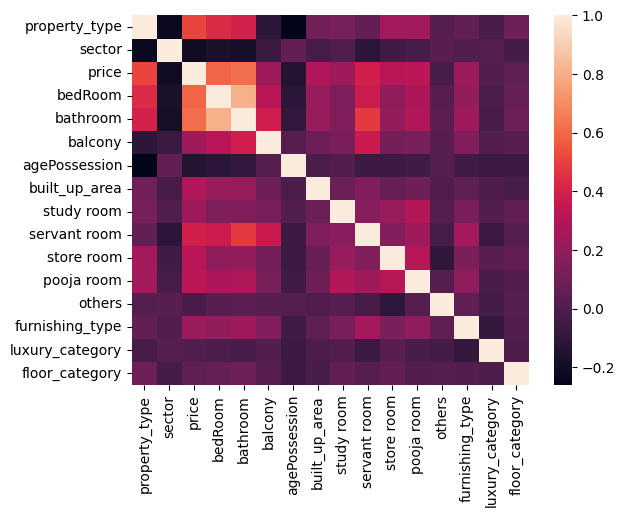

In [23]:
 sns.heatmap(data_label_encoded.corr())

In [24]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.201041
1,price,1.000000
2,bedRoom,0.588706
3,bathroom,0.613787
4,balcony,0.238434
5,agePossession,-0.138505
6,built_up_area,0.287544
7,study room,0.241815
8,servant room,0.392527
9,store room,0.311194


### Technique 2 - Random Forest Feature Importance

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.624721
0,property_type,0.118470
1,sector,0.108632
3,bathroom,0.028549
2,bedRoom,0.024966
8,servant room,0.022997
5,agePossession,0.014413
4,balcony,0.011534
12,furnishing_type,0.009240
9,store room,0.007638


### Technique 3 - Gradient Boosting Feature importances

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.666323
1,sector,0.106435
0,property_type,0.105412
3,bathroom,0.039556
2,bedRoom,0.033598
8,servant room,0.022548
9,store room,0.007582
5,agePossession,0.006261
7,study room,0.003916
12,furnishing_type,0.003909


### Technique 4 - Permutation Importance

In [27]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.736865
0,property_type,0.215372
1,sector,0.175243
8,servant room,0.017650
4,balcony,0.006018
3,bathroom,0.005430
5,agePossession,0.001836
12,furnishing_type,0.001793
14,floor_category,0.001307
11,others,0.000939


### Technique 5 - LASSO

In [28]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
0,property_type,0.808251
3,bathroom,0.595960
2,bedRoom,0.383629
6,built_up_area,0.366670
8,servant room,0.355110
9,store room,0.241490
7,study room,0.212996
12,furnishing_type,0.161276
4,balcony,0.131475
10,pooja room,0.114797


### Technique 6 - RFE

In [29]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.627569
0,property_type,0.115892
1,sector,0.105229
3,bathroom,0.028823
2,bedRoom,0.023352
8,servant room,0.023268
5,agePossession,0.015063
4,balcony,0.011885
12,furnishing_type,0.010504
9,store room,0.007983


### Technique 7 - Linear Regression Weights

In [30]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
0,property_type,0.814838
3,bathroom,0.592880
2,bedRoom,0.383498
6,built_up_area,0.373849
8,servant room,0.357508
9,store room,0.243979
7,study room,0.219045
12,furnishing_type,0.169036
4,balcony,0.139601
10,pooja room,0.117790


In [31]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [32]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.201041,0.108632,0.106435,0.175243,-0.126603,0.105229,-0.134513
bedRoom,0.588706,0.024966,0.033598,0.000899,0.383629,0.023352,0.383498
bathroom,0.613787,0.028549,0.039556,0.005430,0.595960,0.028823,0.592880
balcony,0.238434,0.011534,0.001526,0.006018,0.131475,0.011885,0.139601
agePossession,-0.138505,0.014413,0.006261,0.001836,-0.014345,0.015063,-0.021732
built_up_area,0.287544,0.624721,0.666323,0.736865,0.366670,0.627569,0.373849
study room,0.241815,0.005858,0.003916,-0.001669,0.212996,0.007909,0.219045
servant room,0.392527,0.022997,0.022548,0.017650,0.355110,0.023268,0.357508
store room,0.311194,0.007638,0.007582,0.000159,0.241490,0.007983,0.243979


In [33]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [34]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.735820
sector             0.136679
bathroom           0.028738
servant room       0.024073
bedRoom            0.023311
agePossession      0.010583
balcony            0.008651
furnishing_type    0.007157
store room         0.006585
study room         0.004550
luxury_category    0.004417
floor_category     0.003838
pooja room         0.003378
others             0.002221
dtype: float64

In [35]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,65.0,3.0,4.0,4.0,2.0,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
1,1.0,113.0,1.0,1.0,0.0,3.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,59.0,3.0,3.0,4.0,0.0,2400.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,105.0,3.0,3.0,4.0,3.0,1929.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0
4,0.0,99.0,2.0,2.0,3.0,3.0,1670.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,1.0,9.0,2.0,2.0,1.0,0.0,450.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3547,0.0,90.0,3.0,2.0,2.0,0.0,1472.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
3548,0.0,10.0,1.0,1.0,1.0,1.0,778.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3549,0.0,109.0,2.0,2.0,3.0,1.0,896.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [37]:
scores.mean()

0.8005792787784088

In [38]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [39]:
scores.mean()

0.8063459209680914

In [40]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [41]:
export_df.to_csv('post_feature_selection.csv', index=False)

In [42]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,65.0,3.0,4.0,4.0,2.0,1900.0,1.0,0.0,1.0,2.0,2.0,1.54
1,1.0,113.0,1.0,1.0,0.0,3.0,33.0,0.0,0.0,0.0,1.0,1.0,0.07
2,0.0,59.0,3.0,3.0,4.0,0.0,2400.0,1.0,0.0,0.0,0.0,2.0,2.70
3,0.0,105.0,3.0,3.0,4.0,3.0,1929.0,1.0,0.0,0.0,2.0,2.0,1.25
4,0.0,99.0,2.0,2.0,3.0,3.0,1670.0,0.0,0.0,0.0,1.0,0.0,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,1.0,9.0,2.0,2.0,1.0,0.0,450.0,0.0,0.0,0.0,1.0,1.0,0.37
3547,0.0,90.0,3.0,2.0,2.0,0.0,1472.0,0.0,0.0,0.0,2.0,2.0,0.80
3548,0.0,10.0,1.0,1.0,1.0,1.0,778.0,0.0,0.0,0.0,2.0,0.0,0.46
3549,0.0,109.0,2.0,2.0,3.0,1.0,896.0,0.0,0.0,0.0,1.0,0.0,0.56
